In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score

from xgboost import XGBClassifier

In [10]:
df = pd.read_excel("data_modified_v3.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,...,CLTV_Category,MonthlyPurchase_Category,tenure_cltv_category,tenure_cltv_churn_rate,tenure_monthly_purchase_category,cltv_monthly_purchase_category,tenure_cltv_monthly_purchase_category,tenure_monthly_purchase_churn_rate,cltv_monthly_purchase_churn_rate,tenure_cltv_monthly_purchase_churn_rate
0,0,2,Jakarta,Mid End,1,1,0,0,0,0,...,Low CLTV,Medium Monthly Purchase,Low Tenure Low CLTV,0.487218,Low Tenure Medium Monthly Purchase,Low CLTV Medium Monthly Purchase,Low Tenure Low CLTV Medium Monthly Purchase,0.570925,0.388945,0.553699
1,1,2,Jakarta,High End,0,0,0,0,0,0,...,Low CLTV,Medium Monthly Purchase,Low Tenure Low CLTV,0.487218,Low Tenure Medium Monthly Purchase,Low CLTV Medium Monthly Purchase,Low Tenure Low CLTV Medium Monthly Purchase,0.570925,0.388945,0.553699
2,2,8,Jakarta,High End,0,0,1,0,1,1,...,Medium CLTV,High Monthly Purchase,Low Tenure Medium CLTV,0.503417,Low Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Low Tenure Medium CLTV High Monthly Purchase,0.747059,0.305344,0.691358
3,3,28,Jakarta,High End,0,0,1,1,1,1,...,Medium CLTV,High Monthly Purchase,Medium Tenure Medium CLTV,0.226968,Medium Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Medium Tenure Medium CLTV High Monthly Purchase,0.404678,0.305344,0.380048
4,4,49,Jakarta,High End,0,1,1,0,1,1,...,Medium CLTV,High Monthly Purchase,Medium Tenure Medium CLTV,0.226968,Medium Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Medium Tenure Medium CLTV High Monthly Purchase,0.404678,0.305344,0.380048


In [11]:
df.drop(["Customer ID", "Latitude", "Longitude"], axis=1, inplace=True)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,...,CLTV_Category,MonthlyPurchase_Category,tenure_cltv_category,tenure_cltv_churn_rate,tenure_monthly_purchase_category,cltv_monthly_purchase_category,tenure_cltv_monthly_purchase_category,tenure_monthly_purchase_churn_rate,cltv_monthly_purchase_churn_rate,tenure_cltv_monthly_purchase_churn_rate
0,2,Jakarta,Mid End,1,1,0,0,0,0,Digital Wallet,...,Low CLTV,Medium Monthly Purchase,Low Tenure Low CLTV,0.487218,Low Tenure Medium Monthly Purchase,Low CLTV Medium Monthly Purchase,Low Tenure Low CLTV Medium Monthly Purchase,0.570925,0.388945,0.553699
1,2,Jakarta,High End,0,0,0,0,0,0,Pulsa,...,Low CLTV,Medium Monthly Purchase,Low Tenure Low CLTV,0.487218,Low Tenure Medium Monthly Purchase,Low CLTV Medium Monthly Purchase,Low Tenure Low CLTV Medium Monthly Purchase,0.570925,0.388945,0.553699
2,8,Jakarta,High End,0,0,1,0,1,1,Pulsa,...,Medium CLTV,High Monthly Purchase,Low Tenure Medium CLTV,0.503417,Low Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Low Tenure Medium CLTV High Monthly Purchase,0.747059,0.305344,0.691358
3,28,Jakarta,High End,0,0,1,1,1,1,Pulsa,...,Medium CLTV,High Monthly Purchase,Medium Tenure Medium CLTV,0.226968,Medium Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Medium Tenure Medium CLTV High Monthly Purchase,0.404678,0.305344,0.380048
4,49,Jakarta,High End,0,1,1,0,1,1,Debit,...,Medium CLTV,High Monthly Purchase,Medium Tenure Medium CLTV,0.226968,Medium Tenure High Monthly Purchase,Medium CLTV High Monthly Purchase,Medium Tenure Medium CLTV High Monthly Purchase,0.404678,0.305344,0.380048


In [12]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)', 'service_used',
       'payment_method_churn_rate', 'location_churn_rate', 'device_churn_rate',
       'games_churn_rate', 'music_churn_rate', 'education_churn_rate',
       'call_center_churn_rate', 'video_churn_rate', 'myapp_churn_rate',
       'service_used_churn_rate', 'device_games_churn_rate',
       'device_music_churn_rate', 'device_education_churn_rate',
       'device_call_center_churn_rate', 'device_video_churn_rate',
       'device_myapp_churn_rate', 'device_service_churn_rate',
       'device_location_churn_rate', 'device_payment_method_churn_rate',
       'location_device_payment_method_churn_rate',
       'location_device_payment_method_service_churn_rate',
       'location_device_payment_method_games_churn_

In [13]:
df.dtypes

Tenure Months                                                               int64
Location                                                                   object
Device Class                                                               object
Games Product                                                               int64
Music Product                                                               int64
Education Product                                                           int64
Call Center                                                                 int64
Video Product                                                               int64
Use MyApp                                                                   int64
Payment Method                                                             object
Monthly Purchase (Thou. IDR)                                              float64
Churn Label                                                                 int64
CLTV (Predicted 

In [45]:
# scaler = MinMaxScaler()
# need_scaled = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# df[need_scaled] = scaler.fit_transform(df[need_scaled])
# df.head()



# commented out because the accuracy is lower than the original

In [17]:
def encode_data(df):
    if df.dtype == "object":
        le = LabelEncoder()
        df = le.fit_transform(df)
    return df

In [18]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,...,CLTV_Category,MonthlyPurchase_Category,tenure_cltv_category,tenure_cltv_churn_rate,tenure_monthly_purchase_category,cltv_monthly_purchase_category,tenure_cltv_monthly_purchase_category,tenure_monthly_purchase_churn_rate,cltv_monthly_purchase_churn_rate,tenure_cltv_monthly_purchase_churn_rate
0,2,1,2,1,1,0,0,0,0,2,...,1,2,3,0.487218,5,5,11,0.570925,0.388945,0.553699
1,2,1,0,0,0,0,0,0,0,3,...,1,2,3,0.487218,5,5,11,0.570925,0.388945,0.553699
2,8,1,0,0,0,1,0,1,1,3,...,2,0,4,0.503417,3,6,12,0.747059,0.305344,0.691358
3,28,1,0,0,0,1,1,1,1,3,...,2,0,7,0.226968,6,6,21,0.404678,0.305344,0.380048
4,49,1,0,0,1,1,0,1,1,1,...,2,0,7,0.226968,6,6,21,0.404678,0.305344,0.380048


In [19]:
fig = px.bar(df.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [70]:
over = SMOTE(sampling_strategy=1)

X = df.drop(["Churn Label"], axis=1)
y = df["Churn Label"]

In [71]:
X, y = over.fit_resample(X, y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8278, 58), (2070, 58), (8278,), (2070,))

In [79]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    
    # Evaluate model performance and print results
    print("Training Accuracy: ", '{:.2%}'.format(method.score(x_train, y_train)))
    print("Testing Accuracy: ", '{:.2%}'.format(method.score(x_test, y_test)))
    print("ROC AUC TRAINING SCORE: ", '{:.2%}'.format(roc_auc_score(y_train, method.predict(x_train))))
    print("ROC AUC TEST SCORE: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print("Recall Test: ", '{:.2%}'.format(recall_score(y_test, predictions)))
    print("Precision Test: ", '{:.2%}'.format(precision_score(y_test, predictions)))
    print("F1 Score Test: ", '{:.2%}'.format(f1_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

    # Plot ROC curve and calculate AUC metric

    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions)
    auc_score = auc(false_positive_rate, true_positive_rate)
    fig = px.area(
        x = false_positive_rate,
        y = true_positive_rate,
        title=f'ROC Curve (AUC={auc_score:.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()
    
    


Training Accuracy:  100.00%
Testing Accuracy:  97.54%
ROC AUC TRAINING SCORE:  100.00%
ROC AUC TEST SCORE:  97.54%
Model accuracy:  97.54%
Recall Test:  97.87%
Precision Test:  97.22%
F1 Score Test:  97.54%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1035
           1       0.97      0.98      0.98      1035

    accuracy                           0.98      2070
   macro avg       0.98      0.98      0.98      2070
weighted avg       0.98      0.98      0.98      2070



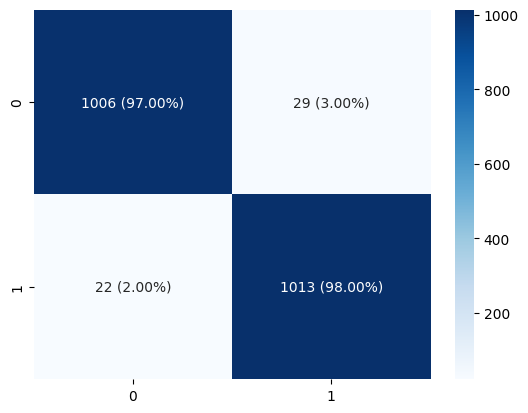

In [80]:
xgb = XGBClassifier()

model(xgb, X_train, y_train, X_test, y_test)

In [81]:
# check params xgb
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [82]:
xgb = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 150, 200],
}

grid_clf = GridSearchCV(xgb, param_grid, scoring='roc_auc', cv=3, n_jobs=1, verbose=1)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
0.9979961430615978


In [83]:
#roc auc score
print(roc_auc_score(y_test, grid_clf.predict(X_test)))

#accuracy score
print(accuracy_score(y_test, grid_clf.predict(X_test)))

0.978743961352657
0.978743961352657


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1035
           1       0.98      0.98      0.98      1035

    accuracy                           0.98      2070
   macro avg       0.98      0.98      0.98      2070
weighted avg       0.98      0.98      0.98      2070



<Axes: >

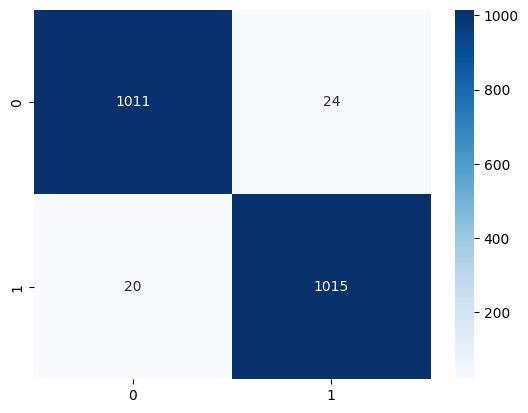

In [84]:
# classification report
print(classification_report(y_test, grid_clf.predict(X_test)))

#confusion matrix
c_matrix = confusion_matrix(y_test, grid_clf.predict(X_test))

#plot confusion matrix
sns.heatmap(c_matrix, annot=True, fmt='', cmap='Blues')



In [85]:
# feature importance
importance = grid_clf.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)
fig = px.bar(feature_imp, color=feature_imp, title='Feature Importance', orientation='h', width=2000, height=1000)
fig.show()

In [86]:
feature_imp2 = feature_imp[:20]
feature_imp2

location_device_payment_method_monthly_purchase_music_churn_rate          0.378473
location_device_payment_method_monthly_purchase_games_churn_rate          0.181955
location_device_payment_method_monthly_purchase_education_churn_rate      0.103295
location_device_payment_method_monthly_purchase_call_center_churn_rate    0.055771
location_device_payment_method_monthly_purchase_myapp_churn_rate          0.029902
tenure_cltv_churn_rate                                                    0.026892
location_device_payment_method_monthly_purchase_video_churn_rate          0.025437
device_churn_rate                                                         0.015212
location_churn_rate                                                       0.010703
Tenure Months                                                             0.010056
location_device_payment_method_call_center_churn_rate                     0.009365
Music Product                                                             0.009228
tenu

Training Accuracy:  98.14%
Testing Accuracy:  97.20%
ROC AUC TRAINING SCORE:  98.14%
ROC AUC TEST SCORE:  97.21%
Model accuracy:  97.20%
Recall Test:  97.75%
Precision Test:  96.61%
F1 Score Test:  97.18%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1049
           1       0.97      0.98      0.97      1021

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070



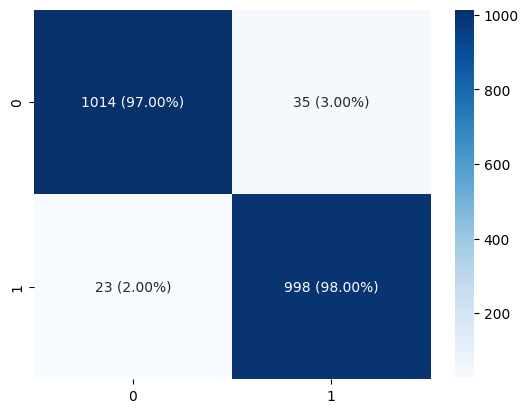

In [88]:
# let's try to train with the best feature 
X = df[feature_imp2.index]
y = df["Churn Label"]

X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=150
)

model(xgb, X_train, y_train, X_test, y_test)
